In [86]:
import numpy as np
import pandas as pd
import math
import random
from random import randint

In [87]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [95]:
sizeOfMatrix = 7 #7*7
agents = {1: 1, 2: 2, 3: 3} #1 - blue; 2 - red; 3 - white;
frameNotHapinessNeighbourhood = pd.DataFrame(columns=['address_i', 'address_j'])
frameEmptyCells = pd.DataFrame(columns=['address_i', 'address_j'])

In [89]:
def randomFilling(sizeOfMatrix, agents, data): #Функция заполнения 
  blueCells = 0.45 #Процентное соотношение синих к общему числу
  redCells = 0.45 #Процентное соотношение красных к общему числу
  whiteCells = 0.10 #Процентное соотношение белых (пустых) к общему числу
  sizeOfBlue = 0 #Количество синих клеток за заданный промежуток времени
  sizeOfRed = 0 #Количество красных клеток за заданный промежуток времени
  sizeOfWhite = 0 #Количество белых (пустых) клеток за заданный промежуток времени

  maxValueBlue = round((sizeOfMatrix ** 2) * blueCells) #Вычисление максимального количества синих клеток 
  maxValueRed = round((sizeOfMatrix ** 2) * redCells) #Вычисление максимального количества красных клеток 
  maxValueWhite = round((sizeOfMatrix ** 2) * whiteCells) #Вычисление максимального количества пустых клеток 

  for i in range(sizeOfMatrix): #Рандомно заполняем сетку в заисимости от условия
    for j in range(sizeOfMatrix):
      successOfCell = False

      while successOfCell != True:
        randomValue = randint(1,3)
        if randomValue == 1 and sizeOfBlue < maxValueBlue:
          data[i][j] = agents[1] #blue 
          sizeOfBlue = sizeOfBlue + 1
          successOfCell = True
        if randomValue == 2 and sizeOfRed < maxValueRed:
          data[i][j] = agents[2] #red
          sizeOfRed = sizeOfRed + 1
          successOfCell = True
        if randomValue == 3 and sizeOfWhite < maxValueWhite:
          data[i][j] = agents[3] #white
          sizeOfWhite = sizeOfWhite + 1
          successOfCell = True
        if sizeOfBlue == maxValueBlue & sizeOfRed == maxValueRed & sizeOfWhite == maxValueWhite:
          successOfCell = True

  return data

In [90]:
def Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood): #Функция определения несчатливых клеток
  frameEmptyCells = frameEmptyCells.iloc[0:0]
  frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.iloc[0:0]
  for i in range(sizeOfMatrix):
    for j in range(sizeOfMatrix):
      countOfHappyNeighbors = 0
      if i == 0 and j == 0: #В случае если клетка в крайне левом верхнем положении
        if data[i][j] == data[i][j + 1]: 
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == 0: #В случае если клетка в крайне левом нижнем положении
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == 0 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом верхнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
      elif i == sizeOfMatrix - 1 and j == sizeOfMatrix - 1: #В случае если клетка в крайне правом нижнем положении
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
    

      elif i - 1 < 0: #Условие если заднная клетка находится на крайне верхней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j - 1 < 0: #Условие если заднная клетка находится на крайне левой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      elif j + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне правой грани 
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
 
      elif i + 1 == sizeOfMatrix: #Условие если заднная клетка находится на крайне нижней грани 
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      else: #Условие если заднная клетка имеет соседей со всех сторон
        if data[i][j] == data[i - 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i - 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j + 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i + 1][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1
        if data[i][j] == data[i][j - 1]:
          countOfHappyNeighbors = countOfHappyNeighbors + 1

      if data[i][j] == agents[3]:
        frameEmptyCells = frameEmptyCells.append({'address_i': i, 'address_j': j}, ignore_index=True)

      if countOfHappyNeighbors < 2:
        if data[i][j] == agents[3]:
          continue
        frameNotHapinessNeighbourhood = frameNotHapinessNeighbourhood.append({'address_i': i, 'address_j': j}, ignore_index=True)

  return (frameNotHapinessNeighbourhood, frameEmptyCells)

In [91]:
def ChangeData(data, frameNotHapinessNeighbourhood, frameEmptyCells): #Функция перестановки 
  tempEmptyCells = frameEmptyCells.sample()
  frameEmptyCells.drop(labels = tempEmptyCells.index, axis = 0, inplace = True)
  print(tempEmptyCells)

  tempNotHappinessCells = frameNotHapinessNeighbourhood.sample()
  frameNotHapinessNeighbourhood.drop(labels = tempNotHappinessCells.index, axis = 0, inplace = True)
  print(tempNotHappinessCells)

  data[int(tempEmptyCells.address_i)][int(tempEmptyCells.address_j)] = data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)]
  data[int(tempNotHappinessCells.address_i)][int(tempNotHappinessCells.address_j)] = agents[3]
  frameEmptyCells = frameEmptyCells.append({'address_i': int(tempNotHappinessCells.address_i), 'address_j': int(tempNotHappinessCells.address_j)}, ignore_index=True)
  
  return data

In [92]:
def СonversionСolorScheme(sizeOfMatrix, data, agents): #Преобразование data в сетку из 3 элементов
  A1 = np.zeros((sizeOfMatrix, sizeOfMatrix))
  A2 = np.zeros((sizeOfMatrix, sizeOfMatrix))

  A1[A1==0] = None
  A2[A2==0] = None

  pwargs = {'interpolation':'nearest'}
  for i in range(sizeOfMatrix):
    for j in range(sizeOfMatrix):
      if data[i][j] == agents[1]:
        A1[i,j] = 1
        plt.imshow(A1,cmap=plt.cm.jet,**pwargs)
      if data[i][j] == agents[2]:
        A2[i,j] = 1
        plt.imshow(A2,cmap=plt.cm.hsv,**pwargs)
    
  plt.show()

In [98]:
def IterationsSegregation(sizeOfIterations, frameEmptyCells, frameNotHapinessNeighbourhood, sizeOfMatrix, agents): #Вывод клеток за заданное число шагов
  data = [] #Массив клеток
  for i in range(sizeOfMatrix): #Заполнение его пустыми элементами
    data.append([0]*sizeOfMatrix)
  data = randomFilling(sizeOfMatrix, agents, data)

  for j in range(sizeOfIterations):
    СonversionСolorScheme(sizeOfMatrix, data, agents)
    SegframeNotHapinessNeighbourhood, SegframeEmptyCells  = Iterations(data, sizeOfMatrix, frameEmptyCells, frameNotHapinessNeighbourhood)
    data = ChangeData(data, SegframeNotHapinessNeighbourhood, SegframeEmptyCells)

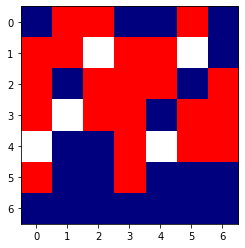

  address_i address_j
0         1         2
  address_i address_j
8         5         0


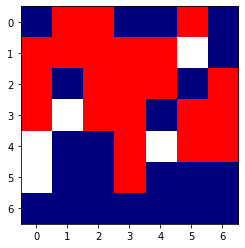

  address_i address_j
0         1         5
  address_i address_j
3         0         5


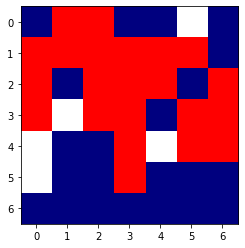

  address_i address_j
4         5         0
  address_i address_j
7         5         3


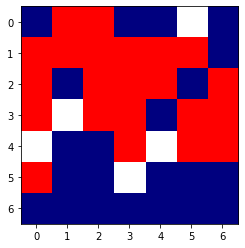

  address_i address_j
2         4         0
  address_i address_j
4         2         1


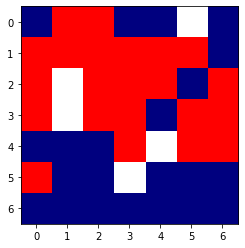

  address_i address_j
1         2         1
  address_i address_j
6         5         0


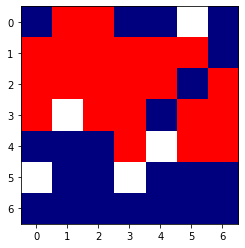

  address_i address_j
2         4         4
  address_i address_j
3         0         6


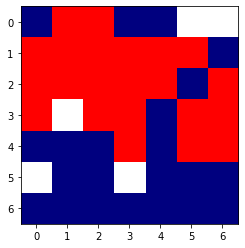

  address_i address_j
2         3         1
  address_i address_j
0         0         0


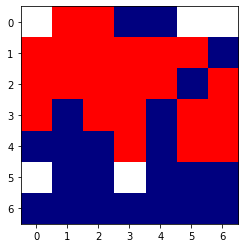

  address_i address_j
3         5         0
  address_i address_j
2         1         6


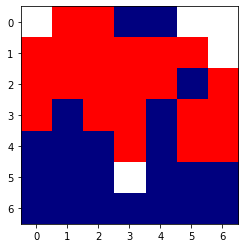

  address_i address_j
2         0         6
  address_i address_j
1         0         4


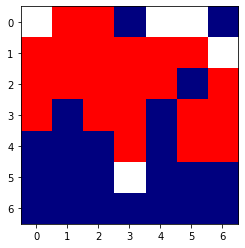

  address_i address_j
3         1         6
  address_i address_j
2         2         5


In [97]:
IterationsSegregation(10, frameEmptyCells, frameNotHapinessNeighbourhood, sizeOfMatrix, agents)